# Reduzindo a Mortalidade de Trânsito nos EUA

### Descrição do Projeto

Embora a taxa de acidentes fatais nas rodovias tenha diminuído constantemente desde os anos 80 nos EUA, nos últimos dez anos houve uma estagnação nessa redução. Juntamente com o aumento do número de milhas percorridas no país, o total de mortes relacionadas ao trânsito tem aumentado nos últimos 10 anos como pode ser observado a seguir:

<img src="https://i.imgur.com/xXHvbdn.png">

Vamos imaginar que por solicitação do Departamento de Transportes dos EUA, estamos atualmente investigando como criar uma estratégia para reduzir a incidência de acidentes de trânsito em todo o país. Ao olhar para a demografia das vítimas de acidentes de trânsito para cada estado dos EUA, descobrimos que há muita variação entre os estados. Agora, queremos entender se há padrões nessa variação para obter sugestões para um plano de ação, no qual em vez de implementar um plano nacional dispendioso, iremos nos concentrar em grupos de estados com perfis semelhantes. A seguir será feita uma análise onde seja possível encontrar esses grupos de maneira estatisticamente sólida e comunicar efetivamente o resultado.

## 1) Carregando os dados e pacotes necessários

Para realizar essa tarefa faremos a manipulação dos dados, a redução de dimensionalidade via PCA e cluster não supervisionado.

Os dados que usaremos foram originalmente coletados pela *National Highway Traffic Safety Administration* e pela *National Association of Insurance Commissioners*, ambas do EUA. Este dataset foi compilado e disponibilizado no formato .csv pelo <a href="https://github.com/fivethirtyeight/data/tree/master/bad-drivers"> FiveThirtyEight</a>.

In [1]:
# pacotes necessários para esse projeto
library(tidyverse)
library(GGally)
library(factoextra)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'GGally' was built under R version 3.5.2"
Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa

Warning message:
"package 'factoextra' was built under R version 3.5.3"Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
# carregando o bad-drivers.csv
car_acc <- read.csv("bad-drivers.csv", sep = ",")

# verificando as primeiras obserções do dataset
head(car_acc)

State,Number.of.drivers.involved.in.fatal.collisions.per.billion.miles,Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Were.Speeding,Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Were.Alcohol.Impaired,Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Were.Not.Distracted,Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Had.Not.Been.Involved.In.Any.Previous.Accidents,Car.Insurance.Premiums....,Losses.incurred.by.insurance.companies.for.collisions.per.insured.driver....
Alabama,18.8,39,30,96,80,784.55,145.08
Alaska,18.1,41,25,90,94,1053.48,133.93
Arizona,18.6,35,28,84,96,899.47,110.35
Arkansas,22.4,18,26,94,95,827.34,142.39
California,12.0,35,28,91,89,878.41,165.63
Colorado,13.6,37,28,79,95,835.50,139.91


In [3]:
# verificando a estrutura do dataset
str(car_acc)

'data.frame':	51 obs. of  8 variables:
 $ State                                                                                                 : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Number.of.drivers.involved.in.fatal.collisions.per.billion.miles                                      : num  18.8 18.1 18.6 22.4 12 13.6 10.8 16.2 5.9 17.9 ...
 $ Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Were.Speeding                                  : int  39 41 35 18 35 37 46 38 34 21 ...
 $ Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Were.Alcohol.Impaired                          : int  30 25 28 26 28 28 36 30 27 29 ...
 $ Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Were.Not.Distracted                            : int  96 90 84 94 91 79 87 87 100 92 ...
 $ Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Had.Not.Been.Involved.In.Any.Previous.Accidents: int  80 94 96 95 89 95 82 99 100 94 ...
 $ Car.Insurance.Premiums....        

In [4]:
# verificando as features do dataset
colnames(car_acc)

[1] "State"                                                                                                 
[2] "Number.of.drivers.involved.in.fatal.collisions.per.billion.miles"                                      
[3] "Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Were.Speeding"                                  
[4] "Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Were.Alcohol.Impaired"                          
[5] "Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Were.Not.Distracted"                            
[6] "Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Had.Not.Been.Involved.In.Any.Previous.Accidents"
[7] "Car.Insurance.Premiums...."                                                                            
[8] "Losses.incurred.by.insurance.companies.for.collisions.per.insured.driver...."

In [5]:
# selecionando as features que serão usadas na análise
car_acc <- car_acc %>%
    select("State",
           "Number.of.drivers.involved.in.fatal.collisions.per.billion.miles",
           "Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Were.Speeding",
           "Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Were.Alcohol.Impaired",
           "Percentage.Of.Drivers.Involved.In.Fatal.Collisions.Who.Had.Not.Been.Involved.In.Any.Previous.Accidents")

# alterando o nome das variáveis
colnames(car_acc) <- c("state", "drvr_fatl_col_bmile", "perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time")

# verificando as primeiras observações do dataset
head(car_acc)

state,drvr_fatl_col_bmile,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
Alabama,18.8,39,30,80
Alaska,18.1,41,25,94
Arizona,18.6,35,28,96
Arkansas,22.4,18,26,95
California,12.0,35,28,89
Colorado,13.6,37,28,95


## 2) Análise exploratória dos dados

Agora serão calculadas as estatísticas resumidas do dataset, e na sequência será gerada uma matriz de gráficos de dispersão e o histograma por feature.

In [6]:
# sumário das estatísticas por variável
summary(car_acc)

        state    drvr_fatl_col_bmile perc_fatl_speed perc_fatl_alcohol
 Alabama   : 1   Min.   : 5.90       Min.   :13.00   Min.   :16.00    
 Alaska    : 1   1st Qu.:12.75       1st Qu.:23.00   1st Qu.:28.00    
 Arizona   : 1   Median :15.60       Median :34.00   Median :30.00    
 Arkansas  : 1   Mean   :15.79       Mean   :31.73   Mean   :30.69    
 California: 1   3rd Qu.:18.50       3rd Qu.:38.00   3rd Qu.:33.00    
 Colorado  : 1   Max.   :23.90       Max.   :54.00   Max.   :44.00    
 (Other)   :45                                                        
 perc_fatl_1st_time
 Min.   : 76.00    
 1st Qu.: 83.50    
 Median : 88.00    
 Mean   : 88.73    
 3rd Qu.: 95.00    
 Max.   :100.00    
                   

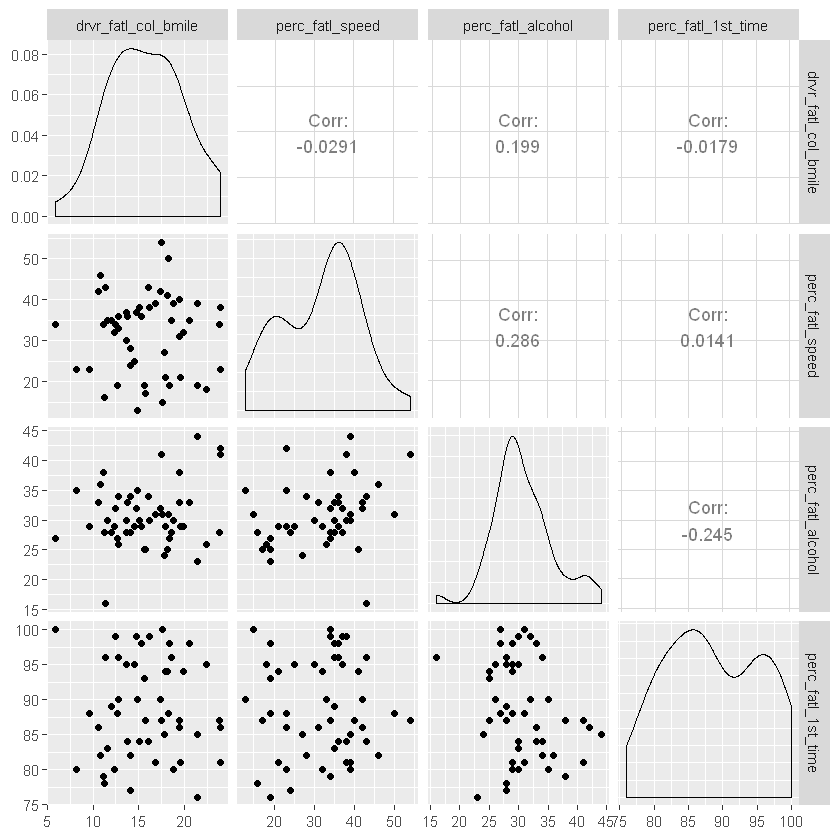

In [7]:
# matriz de gráficos de dispersão e histograma
car_acc %>% 
    select(-state) %>%
    ggpairs()

## 3) Relações entre as features e os acidentes

É possível observar algumas relações interessantes entre a variável independente (número de acidentes fatais) e as demais variáveis. Para quantificar as relações entre pares que observamos nos gráficos de dispersão, podemos calcular a matriz do coeficiente de correlação de Pearson. O coeficiente de correlação de Pearson é um dos métodos mais comuns para quantificar a correlação entre as variáveis no qual os seguintes limiares são usados:

<ul>
<li>0.2 = correlação fraca entre as variáveis</li>
<li>0.5 = correlação média entre as variáveis</li>
<li>0.8 = correlação forte entre as variáveis</li>
<li>0.9 = correlação muito forte entre as variáveis</li>
</ul>

In [8]:
# matriz de correlação de Pearson 
corr_col <- car_acc %>%
    select(-state) %>%
    cor(method = "pearson")

corr_col

,drvr_fatl_col_bmile,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmile,1.00000000,-0.02908015,0.1994263,-0.01794188
perc_fatl_speed,-0.02908015,1.00000000,0.2862442,0.01406622
perc_fatl_alcohol,0.19942634,0.28624417,1.0000000,-0.24545506
perc_fatl_1st_time,-0.01794188,0.01406622,-0.2454551,1.00000000


## 4) Modelo de regressão linear multivariada

Através da matriz de correlação de Pearson é possível observar que a quantidade de acidentes fatais está correlacionada positivamente com o consumo de álcool. 

Tanto a regressão multivariada como a correlação de Pearson medem o quanto as features estão associadas a variável independente (acidentes fatais). Ao comparar os coeficientes de regressão com os coeficientes de correlação, veremos que eles são um pouco diferentes. A razão para isto é que a regressão múltipla calcula a associação de uma feature com uma variável indepente, dada a associação com todas as outras features, o que não é considerado ao calcular os coeficientes de correlação de Pearson.

A seguir será feita a regressão multivariada dos dados para obtermos a influência de cada feature em nossa variável independente.

In [9]:
# modelo de regressão linear multivariada 
fit_reg <- lm(drvr_fatl_col_bmile ~ perc_fatl_speed + perc_fatl_alcohol + perc_fatl_1st_time, data = car_acc)

# coeficientes da regressão
coef(fit_reg)

(Intercept)    perc_fatl_speed  perc_fatl_alcohol perc_fatl_1st_time 
        9.06498048        -0.04180041         0.19086404         0.02473301

## 5) PCA

Foi observado anteriormente que o consumo de álcool está fracamente associado ao número de acidentes fatais nos EUA. Isso poderia nos levar a concluir que o consumo de álcool deve ser o foco para futuras investigações, e que talvez as estratégias devam dividir os estados em consumo de álcool alto, e consumo de álcool baixo. Mas também há associações entre o consumo de álcool e as outras duas features, por isso pode valer a pena tentar dividir os estados de uma maneira que seja considerada as outras três features.

Uma maneira de agrupar os dados é usar a PCA para visualizar os dados no espaço dimensional reduzido, onde podemos tentar obter padrões a olho. A PCA usa a variância absoluta para calcular a variância explicada para cada componente principal, portanto, é importante que as features estejam em uma escala semelhante.

Usaremos a função de escalonamento para padronizar as features para serem centralizados com a média 0 e desvio padrão 1.

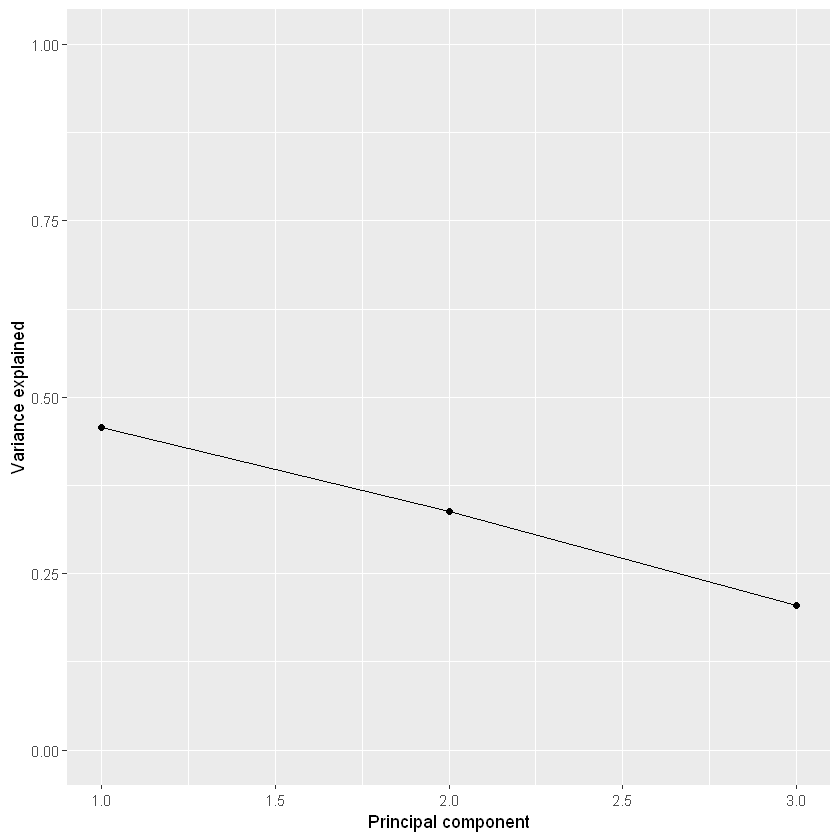

In [10]:
# padronizando e centralizando as três features
car_acc_standised <- car_acc[, c("perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time")]
car_acc_standised$perc_fatl_speed <- scale(car_acc_standised$perc_fatl_speed)
car_acc_standised$perc_fatl_alcohol <- scale(car_acc_standised$perc_fatl_alcohol)
car_acc_standised$perc_fatl_1st_time <- scale(car_acc_standised$perc_fatl_1st_time)

# features de Estados como nome das linhas do car_acc_standised
row.names(car_acc_standised) <- car_acc$state

# PCA
pca_fit <- princomp(car_acc_standised)

# obtendo a proporção de variância explicada por cada componente principal
pr_var <- pca_fit$sdev^2
pve <- pr_var / sum(pr_var)

# visualizando a proporção de variância explicada de cada componente principal
data_frame(comp_id = 1:length(pve), pve) %>%
    ggplot(aes(x = comp_id, y = pve)) + 
        geom_point() + 
        geom_line() +
        coord_cartesian(ylim = c(0,1)) +
        xlab("Principal component") +
        ylab("Variance explained")

In [11]:
# proporção acumulada da variância explicada pelas duas primeiras componentes principais
cve <- cumsum(pve)
cve_pc2 <- cve[2]
print(cve_pc2)

   Comp.2 
0.7946979 


## 6) Encontrando clusters entre estados

Ainda não fica claro somente verificando o gráfico de dispersão do PCA quantos grupos de estados existem. Para auxiliar na identificação de um número razoável de clusters entre os estados, podemos usar o modelo de k-Means clustering criando um scree plot e encontrando o "cotovelo", que indica quando a adição de mais clusters não adiciona muito poder explicativo.

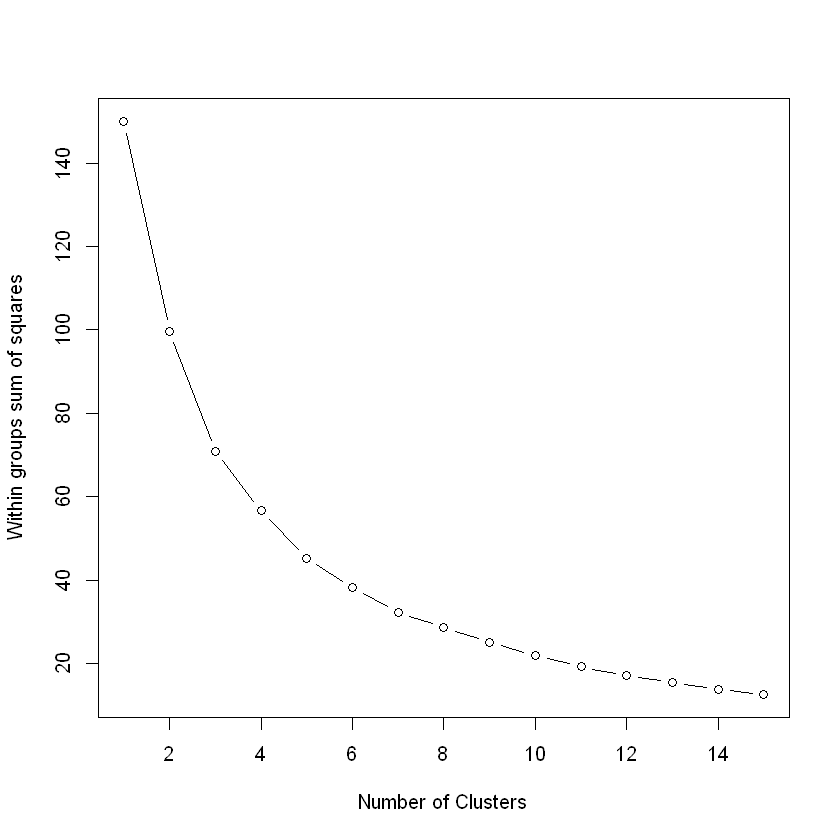

In [12]:
# soma total dos erros ao quadrado: wss
wss <- 0

# lista para salvar os resultados do k-menas
km.out <- list()

# de 1 a 15 centros de cluster
for (i in 1:15) {
  km.out[[i]] <- kmeans(car_acc_standised[, c("perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time")], 
                   centers = i, 
                   nstart = 50)
  # salvando a soma total dos quadrados no objeto wss
  wss[i] <- km.out[[i]]$tot.withinss
}

# visualizando a soma total dos quadrados X o número de clusters
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

## 7)  Visualizando os clusters no gráfico de dispersão da PCA

Os biplots são gráficos que oferecem um jeito compacto de resumir as relações entre as categorias, entre as variáveis, e também entre as variáveis e as categorias (que no caso desse projeto são os Estados), aplicando a função fviz_pca_biplot() do pacote factoextra a interpretação das componentes principais fornecerá melhores informações.

Como vimos pelo scree plot temos aproximadamente três clusters, dado isso usaremos o terceiro output do km.out:

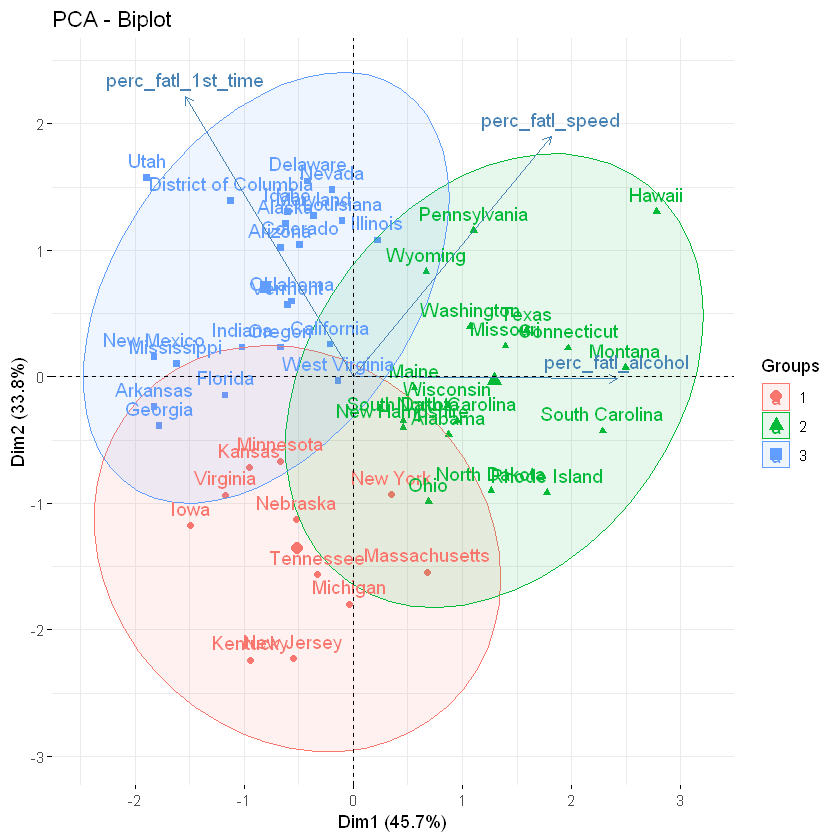

In [13]:
fviz_pca_biplot(pca_fit,
    habillage = km.out[[3]]$cluster,
    addEllipses = TRUE)

## 8) Visualizando a diferença entre features e entre os clusters

Até o momento, usamos tanto a interpretação visual dos dados quanto o modelo de k-means clustering para revelar padrões dos dados, mas o que esses padrões significam?

É importante considerar que as informações que usamos para agrupar os estados em três grupos distintos são as porcentagens de motoristas que estavam em alta velocidade, que estavam alcoolizados e os que nunca estiveram envolvidos em um acidente. Usamos esses clusters para visualizar como os estados se agrupam considerando os dois primeiros componentes principais geradas pela PCA. Isso é bom para entendermos a estrutura dos dados mas nem sempre é fácil de entender, especialmente se os resultados forem comunicados a um público não especializado.

Um próximo passo nessa análise é explorar como os três clusters são diferentes com relação as três features que usamos para realizar os agrupamentos. Em vez de usar os recursos dimensionados, voltarei a usar os recursos não escalonados para nos ajudar a interpretar as diferenças.

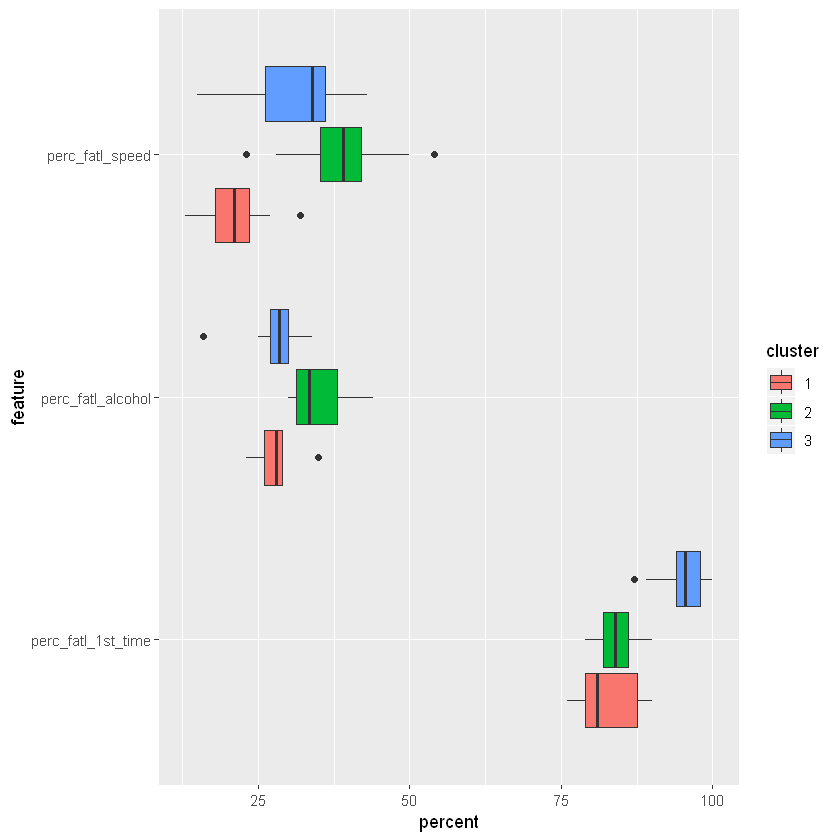

In [14]:
# adicionando a feature de cluster no data frame original
car_acc$cluster <- as.factor(km.out[[3]]$cluster)

# visualizando a diferença entre as features entre os clusters
car_acc %>%
    select(-drvr_fatl_col_bmile) %>%
    gather(key = feature, value = percent, -state, -cluster) %>%
    ggplot(aes(x = feature, y = percent, fill = cluster)) +
        geom_boxplot() +
        coord_flip()

## 9) Calculando o número de acidentes fatais em de cada cluster

Agora está claro que diferentes clusters de estados exigem diferentes ações! Como os recursos e o tempo são sempre limitados, é útil começar com uma intervenção em um dos três grupos primeiro. E qual grupo seria esse? Para determinar isso vou incluir os dados de quantas milhas são percorridas em cada estado pois isso ajudará a calcular o número total de acidentes fatais em cada estado.

In [29]:
# carregando o dataset de milhas por estado
miles_driven <- read.csv("miles_driven.csv", sep = ",")

# verificando as primeiras observações do dataset
head(miles_driven)

state,million_miles_annually
Alabama,64914
Alaska,4593
Arizona,59575
Arkansas,32953
California,320784
Colorado,46606


In [50]:
# juntando o miles_driven com o car_acc 
car_acc_joined <- car_acc  %>% 
  left_join(miles_driven, by = "state")

# verificando as primeiras observações do dataset
head(car_acc_joined)

state,drvr_fatl_col_bmile,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually
Alabama,18.8,39,30,80,2,64914
Alaska,18.1,41,25,94,3,4593
Arizona,18.6,35,28,96,3,59575
Arkansas,22.4,18,26,95,3,32953
California,12.0,35,28,89,3,320784
Colorado,13.6,37,28,95,3,46606


In [58]:
# criando feature do número total de acidentes por estado 
car_acc_joined$num_drvr_fatl_col <- (car_acc_joined$drvr_fatl_col_bmile / 1000000000) * (car_acc_joined$million_miles_annually * 1000000)

# verificando as primeiras observações do dataset
head(car_acc_joined)

state,drvr_fatl_col_bmile,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
Alabama,18.8,39,30,80,2,64914,1220.3832
Alaska,18.1,41,25,94,3,4593,83.1333
Arizona,18.6,35,28,96,3,59575,1108.0950
Arkansas,22.4,18,26,95,3,32953,738.1472
California,12.0,35,28,89,3,320784,3849.4080
Colorado,13.6,37,28,95,3,46606,633.8416


In [59]:
# agrupando por cluster, selecionando as features de interesse e sumarizando os dados 
car_acc_joined_summ <- car_acc_joined %>%
    group_by(cluster) %>%
    select(cluster, num_drvr_fatl_col) %>%
    summarise(count = n(), mean = mean(num_drvr_fatl_col), sum = sum(num_drvr_fatl_col))

car_acc_joined_summ

cluster,count,mean,sum
1,11,860.5059,9465.565
2,18,911.4064,16405.316
3,22,898.3786,19764.329


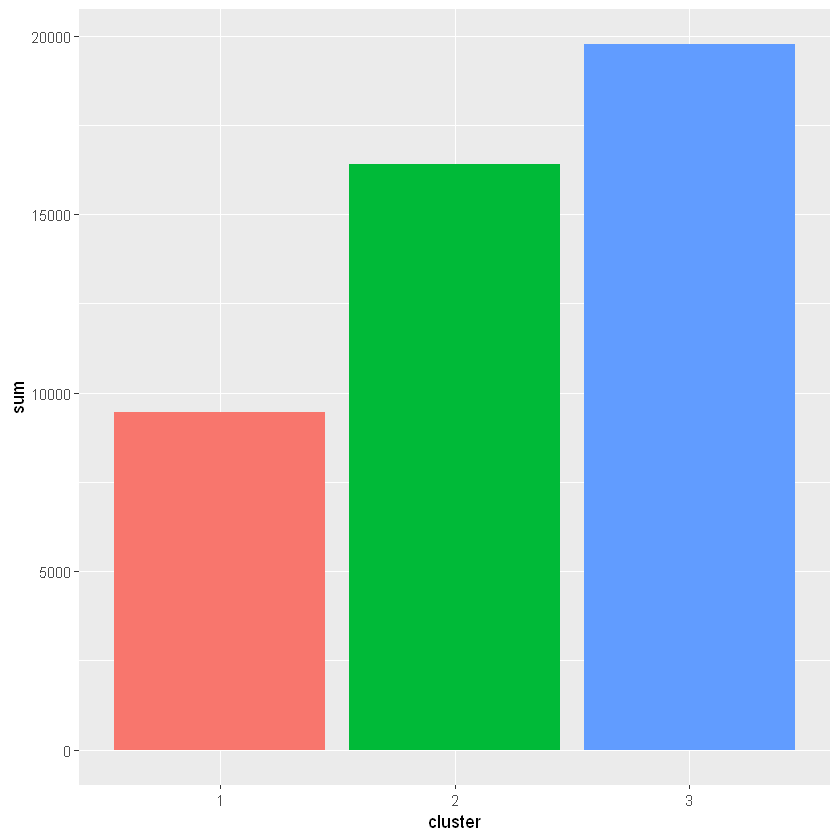

In [60]:
# comparando o total de acidentes fatais por cluster
car_acc_joined_summ %>%
    ggplot(aes(x = cluster, y = sum)) +
        geom_bar(aes(fill = cluster), stat = "identity", show.legend = FALSE)

## Decidindo em qual cluster atuar primeiro

Maravilha! A análise feita até aqui deixa em evidência o cluster 3 como sendo o agrupamento de estados onde mais ocorrem acidentes fatais! 